In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

from cv_utils import *
from loss_utils import get_loss

In [2]:
def invert_image(image):
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Apply a threshold to create a binary mask
    _, mask = cv2.threshold(gray, 251, 255, cv2.THRESH_BINARY)
    
    # Invert the binary mask
    mask = cv2.bitwise_not(mask)
    inverted_image = cv2.bitwise_and(image, image, mask=mask)
    return inverted_image

((501, 501, 3), (512, 512, 3))

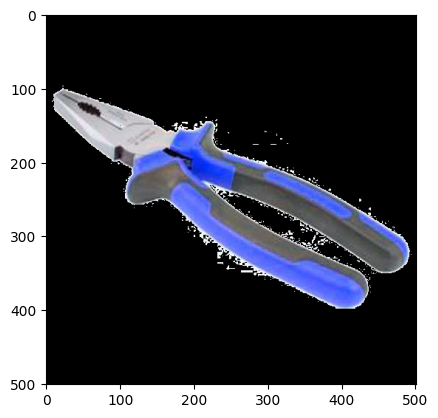

In [10]:
image_path = r"C:\Users\wn00217454\computer_vision\thesis\data\datasets\background_images_labelled\0\6020021201_0_tg1.png"#image_path = r"C:\Users\wn00217454\computer_vision\thesis\data\datasets\labelled_dataset\6020021201\6020021201.webp"
image_path = r"C:\Users\wn00217454\computer_vision\thesis\data\datasets\background_images_augmented\augmented_0.png"
image_path = r"C:\Users\wn00217454\computer_vision\thesis\data\datasets\generated_datasets\diffusion_models\image02.png"
#image_path = r"C:\Users\wn00217454\computer_vision\thesis\data\datasets\background_images_labelled\0\6020021201_0_mlg5.png"
#image_path = r"C:\Users\wn00217454\computer_vision\thesis\data\datasets\background_images_labelled\0\6020021201_0_tg4.png"
image_path = r"C:\Users\wn00217454\computer_vision\thesis\data\datasets\google_dataset\generated\image01.png"

#img = cv2.resize(cv2.imread(image_path, 0), (0, 0), fx=0.8, fy=0.8)
img = cv2.imread(image_path)
img = cv2.resize(img, (img.shape[0], img.shape[0]))


#image_path = r"C:\Users\wn00217454\computer_vision\thesis\data\datasets\labelled_dataset\6020021201\6020021201.webp"
#image_path = r"C:\Users\wn00217454\computer_vision\thesis\data\datasets\dataA\6020021201_110.jpg"
image_path = r"C:\Users\wn00217454\computer_vision\thesis\data\datasets\dataA\6020021201_240.jpg"
image_path = r"C:\Users\wn00217454\computer_vision\thesis\data\datasets\dataA\6020021201_220.jpg"
#image_path = r"C:\Users\wn00217454\computer_vision\thesis\data\datasets\dataA\6020021201_310.jpg"
image_path = r"C:\Users\wn00217454\computer_vision\thesis\data\datasets\google_dataset\img08.jpg"

#template = cv2.resize(cv2.imread(image_path, 0), (0, 0), fx=0.8, fy=0.8)
template = cv2.imread(image_path)
template = invert_image(template)
template = remove_noise(template)
#template = cv2.resize(template, (224, 224))
h, w, c = template.shape
plt.imshow(template)
template.shape, img.shape

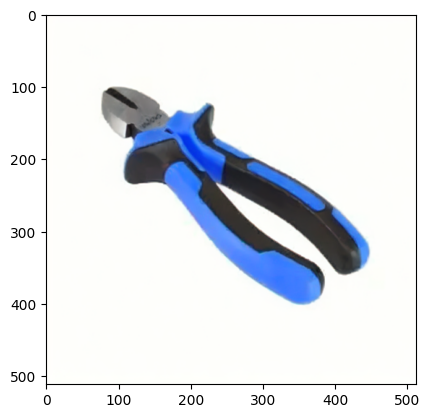

In [11]:
plt.imshow(img)

### 1. Detect an object

In [60]:
def crop_img(image, crop = False):
    # Convert image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Apply thresholding to convert image to binary
    _, binary_image = cv2.threshold(gray_image, 40, 255, cv2.THRESH_BINARY)
    
    
    # Find contours in the binary image
    contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Find the contour with the maximum area
    max_contour = max(contours, key=cv2.contourArea)

    mask = np.zeros_like(gray_image)
    cv2.drawContours(mask, [max_contour], -1, (255), cv2.FILLED)
    
    # Get the rotated rectangle enclosing the contour
    rotated_rect = cv2.minAreaRect(max_contour)

    max_side_obj_length = max(rotated_rect[1])
    max_side_img_length = max(gray_image.shape)
    if max_side_obj_length > max_side_img_length:
        print("True")
        padding_size = int(max_side_obj_length - max_side_img_length) + 1
        # Add padding
        image = np.pad(image, ((padding_size, padding_size), (padding_size, padding_size), (0, 0)), mode='constant')
    
    # Get the rotation angle of the rectangle
    angle = rotated_rect[-1]
    
    # Rotate the image to align the object horizontally
    if angle <= -1 or angle >= 1:
        #print("True, angle = ", angle)
        rotation_matrix = cv2.getRotationMatrix2D(rotated_rect[0], angle - 90, 1)
        rotated_image = cv2.warpAffine(image, rotation_matrix, (image.shape[1], image.shape[0]))
    else:
        rotated_image = image.copy()
    
    # Get the coordinates of the rectangle vertices
    vertices = cv2.boxPoints(rotated_rect)
    vertices = np.int0(vertices)
    
    # Draw the rectangle on the image
    #cv2.drawContours(rotated_image, [vertices], -1, (0, 255, 0), 2)

    if crop:
        #print("True")
        # Calculate the bounding box of the rotated rectangle
        x, y, w, h = cv2.boundingRect(vertices)
        # Crop the rotated rectangle from the original image
        cropped_image = rotated_image[y:y+h, x:x+w]
        
        return cropped_image, mask[y:y+h, x:x+w]
    return rotated_image

True
(557, 557, 3)


C:\Users\wn00217454\AppData\Local\Temp\ipykernel_56988\930371255.py:42: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  vertices = np.int0(vertices)


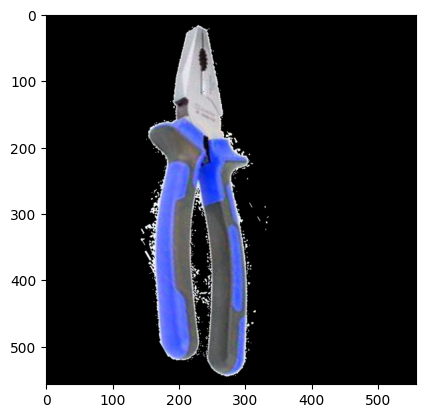

In [63]:
straight_template = crop_img(template)
cropped_template, mask = crop_img(straight_template, crop = True)
print(straight_template.shape)
plt.imshow(straight_template)

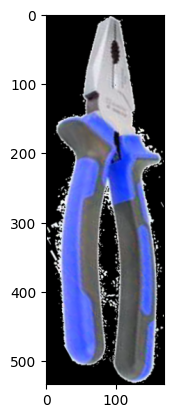

In [64]:
plt.imshow(cropped_template)

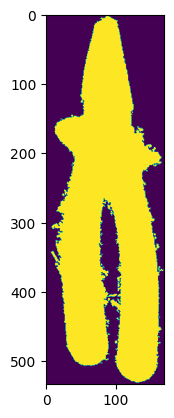

In [65]:
plt.imshow(mask)

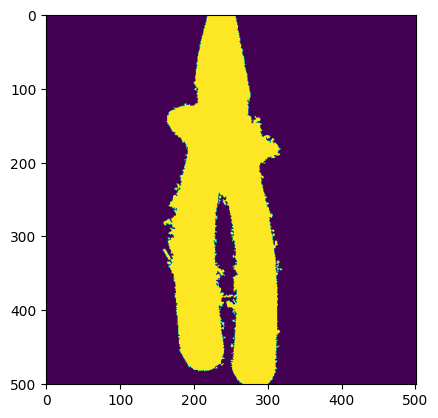

In [66]:
template = cv2.imread(image_path)
cropped_template, mask = find_orig_img_mask(template)

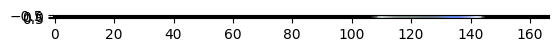

In [67]:
plt.imshow(cropped_template)

In [9]:
object_present_in_generated(cropped_template, img)

True

True

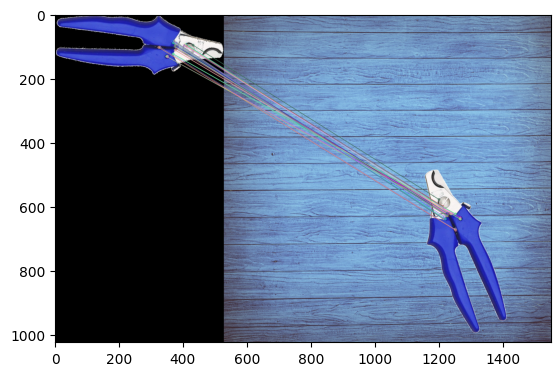

In [10]:
find_object_location(cropped_template, img, 30)

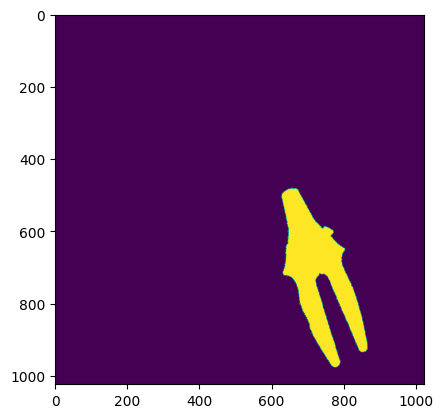

In [11]:
mask_gen = find_object_mask(cropped_template, mask, img, 60)

(503, 185)

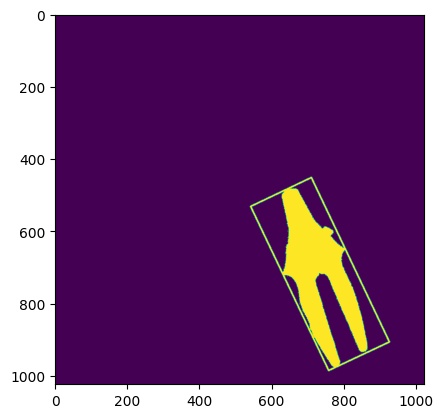

In [12]:
l, w = get_rotated_rectangle_dimensions(mask_gen)
int(l), int(w)

0.36801786729874475

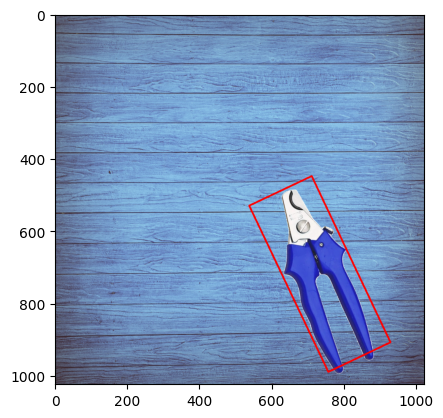

In [13]:
plot_rotated_rectangle_over_mask(img, mask_gen)
w / l

In [14]:
l_orig = max(mask.shape)
w_orig = min(mask.shape)
l_orig, w_orig, w_orig / l_orig

(527, 192, 0.36432637571157495)

In [7]:
def get_loss(image, image_gen, conf = 0.03, threshold = 60):
    loss = 0
    image = resize_template(image, image_gen)
    cropped_template, mask = find_orig_img_mask(image)
    gen_img_mask = find_object_mask(cropped_template, mask, image_gen, threshold)
    
    if gen_img_mask is not None:
        l_orig = max(mask.shape)
        w_orig = min(mask.shape)
        image_ratio = w_orig / l_orig

        l, w = get_rotated_rectangle_dimensions(gen_img_mask)
        
        image_gen_ratio = w / l
        if (image_ratio <= (image_gen_ratio + conf)) and (image_ratio >= (image_gen_ratio - conf)):
            #print("True I")
            return loss
        else:
            #print("True II")
            loss += abs(image_gen_ratio - image_ratio)
            return min(loss, 0.99)
    else:
        #print("True III")
        return 1

In [22]:
image_path = r"C:\Users\wn00217454\computer_vision\thesis\data\datasets\background_images_labelled\0\6020021201_0_tg4.png"
image_path = r"C:\Users\wn00217454\computer_vision\thesis\data\datasets\background_images_labelled\0\6020021201_0_tg1.png"
#image_path = r"C:\Users\wn00217454\computer_vision\thesis\data\datasets\background_images_augmented\augmented_0.png"
#image_path = r"C:\Users\wn00217454\computer_vision\thesis\data\datasets\generated_datasets\diffusion_models\image02.png"
#image_path = r"C:\Users\wn00217454\computer_vision\thesis\data\datasets\dataB\6020021201_120_tg8.png"
#image_path = r"C:\Users\wn00217454\computer_vision\thesis\data\datasets\google_dataset\generated\image02.png"
#image_path = r"C:\Users\wn00217454\computer_vision\thesis\data\datasets\google_dataset\generated\image01.png"
img = cv2.imread(image_path)

image_path = r"C:\Users\wn00217454\computer_vision\thesis\data\datasets\dataA\6020021201_220.jpg"
#image_path = r"C:\Users\wn00217454\computer_vision\thesis\data\datasets\google_dataset\img10.jpg"
#image_path = r"C:\Users\wn00217454\computer_vision\thesis\data\datasets\google_dataset\img08.jpg"
template = cv2.imread(image_path)

print(get_loss(template, img, 0.03, 55))

0


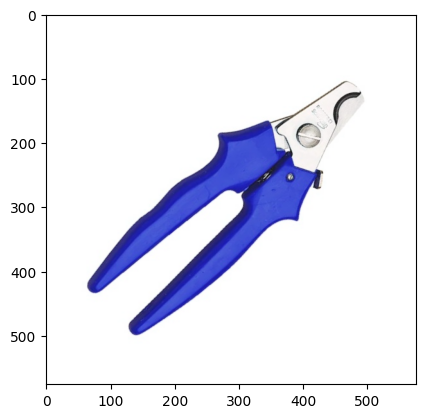

In [23]:
plt.imshow(template)

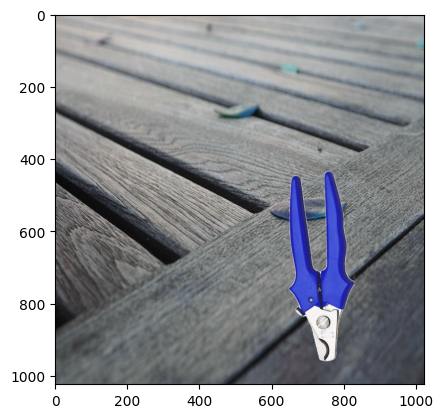

In [24]:
plt.imshow(img)

In [25]:
img.shape, template.shape

((1024, 1024, 3), (576, 576, 3))

In [31]:
template = resize_template(template, img)
cropped_template, mask = find_orig_img_mask(template)
gen_img_mask = find_object_mask(cropped_template, mask, img, threshold = 60)
cropped_template.shape

(190, 526, 3)

(<matplotlib.image.AxesImage at 0x15ecabc9cf0>, (501, 501, 3))

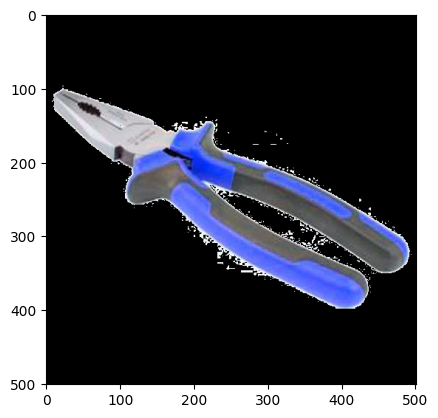

In [5]:
if calculate_percentage_white_pixels(template) > 60:
        template = invert_image(template)

template = remove_noise(template)
plt.imshow(template), template.shape

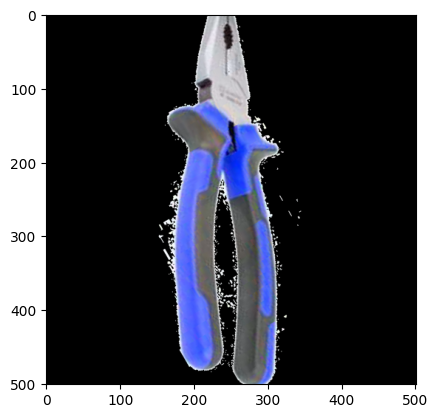

In [7]:
straight_template = crop_img(template)
plt.imshow(straight_template)

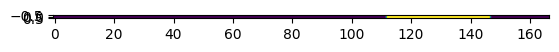

In [24]:
plt.imshow(mask)

In [10]:
cropped_template.shape, img.shape, template.shape

((349, 114, 3), (512, 768, 3), (375, 375, 3))

True

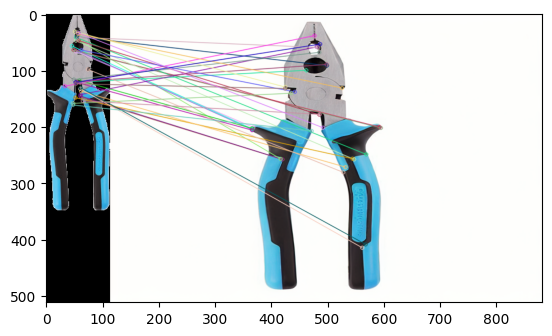

In [11]:
find_object_location(cropped_template, img, 60)

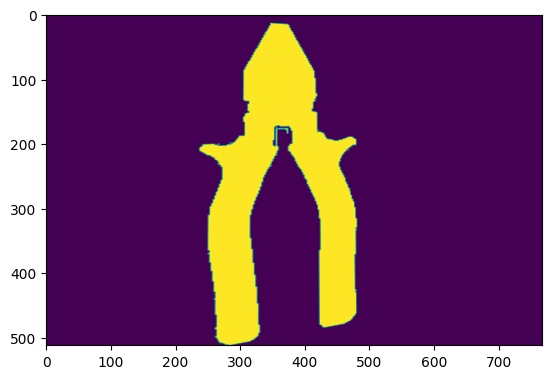

In [12]:
plt.imshow(gen_img_mask)

In [30]:
def find_object_mask(original_image, original_mask, generated_image, threshold = 40):
    if calculate_percentage_white_pixels(generated_image) > 60:
        generated_image = invert_image(generated_image)
    # Convert images to grayscale
    original_gray = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)
    generated_gray = cv2.cvtColor(generated_image, cv2.COLOR_BGR2GRAY)

    # Initialize ORB detector
    orb = cv2.ORB_create()

    # Find keypoints and descriptors for both images
    kp1, des1 = orb.detectAndCompute(original_gray, None)
    kp2, des2 = orb.detectAndCompute(generated_gray, None)

    # Initialize Brute-Force matcher
    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

    # Match descriptors
    matches = bf.match(des1, des2)

    # Sort matches by distance
    matches = sorted(matches, key=lambda x: x.distance)

    # Define a threshold to consider a match as valid

    # List to store valid matches
    valid_matches = []

    # Filter valid matches based on threshold
    for match in matches:
        if match.distance < threshold:
            valid_matches.append(match)

    # If enough valid matches found, object is present
    if len(valid_matches) > 30:  # Adjust threshold as needed
        # Extract matched keypoints
        src_pts = np.float32([kp1[m.queryIdx].pt for m in valid_matches]).reshape(-1, 1, 2)
        dst_pts = np.float32([kp2[m.trainIdx].pt for m in valid_matches]).reshape(-1, 1, 2)

        # Calculate homography
        H, _ = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)

        # Warp mask of object from original image to generated image
        mask_warped = cv2.warpPerspective(original_mask.astype(np.uint8), H, (generated_image.shape[1], generated_image.shape[0]))

        # Display or save the warped mask
        cv2.imwrite("w_iii.png", mask_warped)
        #plt.imshow(mask_warped)
        #cv2.waitKey(0)
        #cv2.destroyAllWindows()
        return mask_warped
    else:
        print("Object not found in generated image")
        return None